# Previously

We learned about defining neural networks, training them and used what we've learned to try on with the MNIST dataset. 

# Objectives 

In this notebook, 
- we will go through all the processes we've learned so far
- we will use a much more complex dataset than the MNIST, which is Fashion-MNIST

# [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist)

![fashion mnist sprite](https://github.com/lbleal1/deep-learning-v2-pytorch/blob/master/intro-to-pytorch/assets/fashion-mnist-sprite.png?raw=true) 

**Dataset Description**

Fashion-MNIST is a set of 28x28 greyscale images of clothes

**Why is it more complex than the MNIST?**
- MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. 
- Fashion-MNIST introduces more classes than the 10 classes MNIST have

***Remark:***
- Since it's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.




# Coding in PyTorch

## 1. Download and Loading the Dataset

In [1]:
# folks the helper package always goes in the way as with the previous notebooks
# so don't forget this one if you're running in colab

!wget https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py

# if this doesn't still get through by running, reset your runtime and
# it will work

# also don't forget to change your Hardware Accelerator above to GPU for faster processing

--2020-01-10 04:31:36--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/3bd7dea850e936d8cb44adda8200e4e2b5d627e3/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.3’

helper.py.3         100%[===================>]   2.75K  --.-KB/s    in 0s      

2020-01-10 04:31:37 (87.3 MB/s) - ‘helper.py.3’ saved [2813/2813]



In [0]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

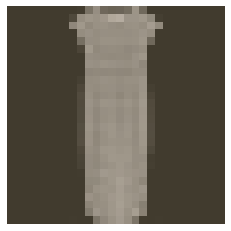

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

## 2. Building the network

Here we want to define the network having the ff:
- include at least one hidden layer
- use ReLU activations for the layers and to return the logits or log-softmax from the forward pass
- *It's up to you how many layers you add and the size of those *layers*

In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:
model = nn.Sequential(nn.Linear(784, 256),
                      nn.ReLU(),
                      nn.Linear(256, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64,32),
                      nn.ReLU(),
                      nn.Linear(32, 16),
                      nn.ReLU(),
                      nn.Linear(16,10),
                      nn.LogSoftmax(dim=1))

# 3. Train the network

We first do our definitions:
* Define the criterion
  - [for more info](http://pytorch.org/docs/master/nn.html#loss-functions)--(something like `nn.CrossEntropyLoss` or `nn.NLLLoss`)
* Define the optimizer
  - [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`)

Then do the training processes. Remember the training pass is a fairly straightforward process:
* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights 
  
By adjusting the hyperparameters (hidden units, learning rate, etc), we should be able to get the training loss below 0.4.



In [0]:
# Create the network, define the criterion and optimizer                    
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005) # lr means learning rate

In [9]:
# Train the network here
epochs = 5

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Do the preliminaries of flattenning the images,
        # and assigning the stuff
        # Flatten images into a 784 long vector
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        log_ps = model(images)
        loss = criterion(log_ps, labels)
        
        # do your process functions here
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 0.4360431312783949
Training loss: 0.38476467188169705
Training loss: 0.3641685796842011
Training loss: 0.3456562873460591
Training loss: 0.342942394888096


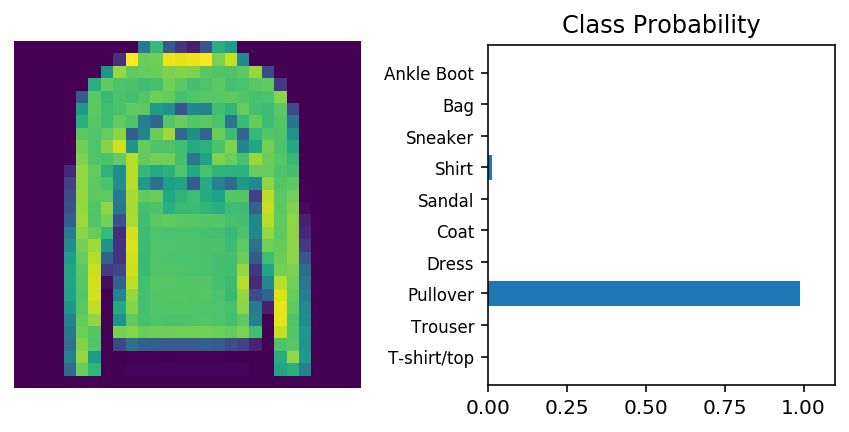

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[1]

# You need to flatten again the image 
# so the size won't incur a mismatch when you 
# feed it to the model
img = img.view(img.shape[0], -1) 

# Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
helper.view_classify(img, ps, version='Fashion')

# Next Up

Here we kind of derailed from the original solution and created a larger network with following the powers of 2. We also did the efficient way of defining a model .

Next, we'll learn about inference and validation since we need to know how our model is performing so far. 